In [ ]:
%%capture
!pip install unidecode word2number stanza

In [ ]:
import pandas as pd
from pprint import pprint
import re
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from html import unescape
import unicodedata
import string
import unidecode
from word2number import w2n
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
tqdm.pandas()

In [ ]:
df0 = pd.read_excel('/content/drive/MyDrive/HSE/Thesis/files/thesis_tables.xlsx')
df1 = pd.read_excel('/content/drive/MyDrive/HSE/Thesis/files/thesis_labels.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/HSE/Thesis/files/label_frequency (1) ms_upd.xlsx')

In [ ]:
df_list = df1.values.tolist()

In [ ]:
ultimate_dict = dict()

for l in df_list:
  l = [x for x in l if type(x) != float]
  for el in l:
    ultimate_dict[el] = l[0]

In [ ]:
all_values = []

for column in df0:
  l = df0[column].to_list()
  l = [x for x in l if type(x) != float]
  val = []
  for x in l:
    if x in ultimate_dict:
        val.append(ultimate_dict[x])
    else:
        val.append(x)
  all_values.extend(val)

In [ ]:
d = df2.set_index('Before').to_dict()['After']
d = {k:v for k,v in d.items() if type(v) == str}

In [ ]:
df_c = pd.Series(all_values)
vc = df_c.value_counts()
print(vc[:10])

C-reactive protein, mg/dL    44
D-Dimer                      43
Age                          39
Clinical characteristics     36
Sex                          35
White blood cell count       34
Comorbidities                32
Death                        32
Ferritin                     29
Lactate dehydrogenase        28
dtype: int64


In [ ]:
values2 = [d[x] if x in d else x for x in all_values]

assert len(values2) == len(all_values)

df_c2 = pd.Series(values2)
vc2 = df_c2.value_counts()

In [ ]:
vc2.to_excel('label_frequency_update_october2021.xlsx', header=False)

In [ ]:
vc.to_excel('label_frequency.xlsx', header=False)

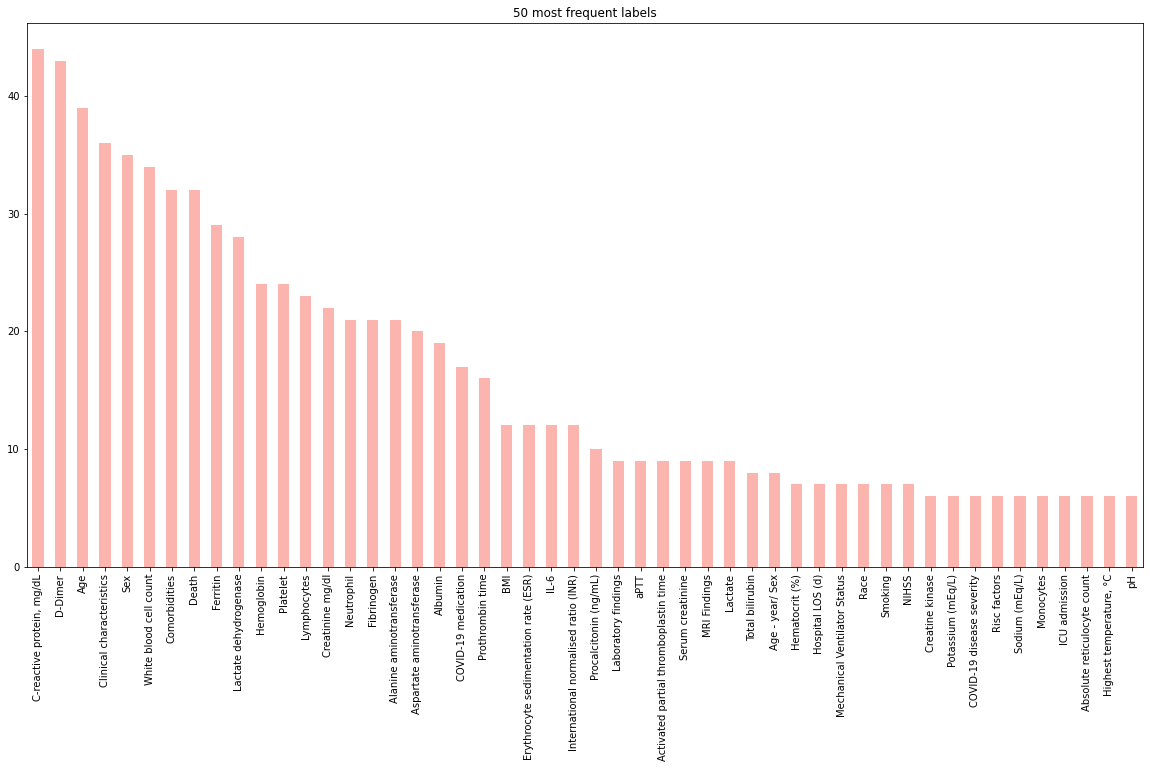

In [ ]:

_ = plt.title('50 most frequent labels')
vc[:50].plot(kind='bar', colormap = 'Pastel1')
plt.savefig('50_most_frequent_labels.png', bbox_inches="tight")

In [ ]:
import stanza

In [ ]:
stanza.download('en', package='mimic', processors={'ner': 'i2b2'})

In [ ]:
nlp = stanza.Pipeline('en', package='mimic', processors={'ner': 'i2b2'})

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/HSE/Thesis/files/patients_description.xls', nrows=100)

In [ ]:
df1

,patient_description,pmcs,age,validity
0,"In the first case, a 39 year-old male, health ...",PMC7126798,39,1
1,"In the second case, a 61 year-old female with ...",PMC7126798,61,1
2,"In the third case, a 29 year-old housekeeper f...",PMC7126798,29,1
3,"In the fourth case, the patient was a 73 year-...",PMC7126798,73,1
4,This 41-year-old man was admitted to the inten...,PMC7365304,41,1
...,...,...,...,...
95,A 42-year-old woman with no history of previou...,PMC7547550,42,1
96,A 77-year-old woman with chronic respiratory d...,PMC7547550,77,1
97,A 26-year-old physician working in a hospital ...,PMC7547550,26,1
98,"A diabetic man, aged 50 years old, was hospita...",PMC7547550,50,1


In [ ]:
thes_tab = pd.read_excel('thesis_tables.xlsx')
heads = set()
for h in thes_tab.columns:
  heads  = heads | set(thes_tab[h].to_list())
heads = [x for x in list(heads) if type(x) ==str]
# with open('/content/drive/MyDrive/HSE/Thesis/files/tab_heads.txt', 'w', encoding = 'utf-8') as f:
#   f.writelines(heads)

In [ ]:
thes_tab = pd.read_excel('thesis_tables.xlsx')
heads = [abs]
for h in thes_tab.columns:
  heads.extend(thes_tab[h].to_list())

heads = [x for x in list(heads) if type(x) ==str]

In [ ]:
len(heads)

1500

In [ ]:
len(set(heads))

1229

In [ ]:
Counter(heads).most_common(50)

[('Sex', 25),
 ('Outcome', 19),
 ('Age', 14),
 ('Comorbidities', 13),
 ('Age (years)', 11),
 ('Ferritin (ng/mL)', 9),
 ('Treatment', 9),
 ('Gender', 8),
 ('CRP (mg/L)', 6),
 ('Fibrinogen (g/L)', 6),
 ('Creatinine (mg/dL)', 6),
 ('Symptoms', 6),
 ('Age, years', 5),
 ('Hemoglobin', 5),
 ('Fever', 5),
 ('ICU admission', 4),
 ('Smoking history', 4),
 ('pH', 4),
 ('Fibrinogen (mg/dL)', 4),
 ('Medical history', 4),
 ('Lactate dehydrogenase (U/L)', 4),
 ('CRP', 4),
 ('Diarrhea', 4),
 ('INR', 4),
 ('Cough', 4),
 ('Lymphocytes', 3),
 ('Monocytes', 3),
 ('Lactate (mmol/L)', 3),
 ('Hemoglobin (g/dL)', 3),
 ('Hematocrit (%)', 3),
 ('ESR (mm/hr)', 3),
 ('Sodium (mmol/L)', 3),
 ('Potassium (mmol/L)', 3),
 ('COVID-19 symptoms', 3),
 ('Race', 3),
 ('Comorbidity', 3),
 ('Neutrophils', 3),
 ('Albumin (g/L)', 3),
 ('Prothrombin time (s)', 3),
 ('Imaging features', 3),
 ('Fibrinogen, mg/dL', 3),
 ('Hematocrit', 3),
 ('Lactate', 3),
 ('D-dimer', 3),
 ('International normalized ratio', 3),
 ('Ethnicity', 3)

In [ ]:
heads[9]

'PT, s'

In [ ]:
pd.DataFrame({'col_names': heads}).to_excel('thesis_labels.xlsx', index=False)

In [ ]:
from collections import Counter

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
a = set(df1.pmcs.to_list())

links = [f'https://www.ncbi.nlm.nih.gov/pmc/articles/{x}/' for x in a]

In [ ]:
pmcs = []

tables = []
strange_links = []
for link in tqdm(links):
    pmc = re.search('PMC\d+', link).group(0)
    r = requests.get(link) 
    try:
      t = pd.read_html(r.text, header=0)
      for tab in t:
        tables.append(tab)
        pmcs.append(pmc)
    except:
      pass

print(len(set(pmcs)))

In [ ]:
pmcs = ['PMC7365304', 'PMC7688415', 'PMC7450954', 'PMC7593723', 'PMC7852477', 'PMC7427433', 'PMC7365853', 'PMC7798182',
        'PMC7547550', 'PMC7126798', 'PMC7231545', 'PMC7128238']

pmcs.append('PMC7493759')
pmcs.append('PMC7862914')
pmcs.append('PMC7341421')
pmcs.append('PMC7582078')
pmcs.append('PMC7529351')
pmcs.append('PMC7195070')
pmcs.append('PMC7737196')
pmcs.append('PMC7524517')
pmcs.append('PMC7413850')
pmcs.append('PMC7354271')
pmcs.append('PMC7641528')
pmcs.append('PMC7239209')
pmcs.append('PMC7375964')
pmcs.append('PMC7485476')
pmcs.append('PMC7441452')
pmcs.append('PMC7512221')
pmcs.append('PMC7531759')
pmcs.append('PMC7501525')
pmcs.append('PMC7587445')
pmcs.append('PMC7303641')
pmcs.append('PMC7780065')
pmcs.append('PMC7110882')
pmcs.append('PMC7451004')
pmcs.append('PMC7904448')
pmcs.append('PMC7258815')
pmcs.append('PMC7834000')
pmcs.append('PMC7446721')
pmcs.append('PMC7825888')
pmcs.append('PMC7480768')
pmcs.append('PMC7499669')
pmcs.append('PMC7782106')
pmcs.append('PMC7521458')
pmcs.append('PMC7468093')
pmcs.append('PMC7276127')
pmcs.append('PMC7395228')
pmcs.append('PMC7392153')
pmcs.append('PMC7492794')
pmcs.append('PMC7337161')
pmcs.append('PMC7898972')
pmcs.append('PMC7642875')
pmcs.append('PMC7247779')
pmcs.append('PMC7439090')
pmcs.append('PMC7674622')
pmcs.append('PMC7187846')
pmcs.append('PMC7748374')
pmcs.append('PMC7477961')
pmcs.append('PMC7200342')
pmcs.append('PMC7482595')
pmcs.append('PMC7799310')
pmcs.append('PMC7793039')
pmcs.append('PMC7833244')
pmcs.append('PMC7354364')
pmcs.append('PMC7434251')
pmcs.append('PMC7834948')
pmcs.append('PMC7511846')
pmcs.append('PMC7242176')
pmcs.append('PMC7434278')

In [ ]:
thes_tab = pd.read_excel('patients update.xlsx')

In [ ]:
thes_tab.to_excel('patients_update.xlsx', index=False)

In [ ]:
len(thes_tab)

255

In [ ]:
thes_tab = thes_tab[thes_tab.pmcs.apply(lambda x: x in pmcs)]

In [ ]:
x = 'PMC7423580'
x in pmcs

False

In [ ]:
link = f'https://www.ncbi.nlm.nih.gov/pmc/articles/{x}/'
print(link)

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7423580/


In [ ]:
tables = []
r = requests.get(link) 
t = pd.read_html(r.text, header=0)
for tab in t:
  tables.append(tab)

print(len(tables))

ValueError: ignored

In [ ]:
links = [f'https://www.ncbi.nlm.nih.gov/pmc/articles/{x}/' for x in pmcs]

In [ ]:
print(links[26])

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7896811/


In [ ]:
tables[0].head()

,Unnamed: 0,Patient 1,Patient 2,Patient 3
0,Clinical characteristics,Clinical characteristics,Clinical characteristics,Clinical characteristics
1,Age (years),53,75,87
2,Sex,Male,Female,Male
3,Exposure history,"Travel to Wuhan (Hubei, China)","Travel to Wuhan (Hubei, China)",Contacted with COVID-19 infected patients
4,Onset symptoms,Onset symptoms,Onset symptoms,Onset symptoms


In [ ]:
x

'PMC7678568'

In [ ]:
for i in list(tables[0].columns.values):
  print(i)

In [ ]:
for i in tables[0][tables[0].columns[0]].to_list():
# for i in zip(tables[0][tables[0].columns[0]].to_list(), tables[0][tables[0].columns[1]].to_list()):
#   i = [l for l in i if type(l) is str]
#   print(*i)
  if type(i) == str:
    print(i)

Clinical characteristics
Age (years)
Sex
Exposure history
Onset symptoms
Fever
Diarrhea
Anorexia
Cough
Sputum
Shortness of breath
Sore throat
Dizziness
Myalgia
Headache
Comorbidities
Etiology of cirrhosis
Interval between onset and admission (days)
Child–Pugh class
MELD score
Laboratory characteristics
White blood cell (× 109/L)
Neutrophils (× 109/L)
Lymphocyte (× 109/L)
Platelet (× 109/L)
ALT (U/L)
AST (U/L)
GGT (U/L)
ALP (U/L)
Total bilirubin (μmol/L)
Direct bilirubin (μmol/L)
Albumin (g/L)
Lactate dehydrogenase (U/L)
Blood urea nitrogen (mmol/L)
Serum creatinine (μmol/L)
APTT (s)
Prothrombin time (s)
International normalized ratio
D-dimer (µg/L)
C-reactive protein (mg/L)
Procalcitonin (ng/mL)
Chest CT evidence of pneumonia
Typical signs of viral infection


In [ ]:
print(df1.patient_description.iloc[1])

In the second case, a 61 year-old female with diabetes mellitus and dyslipidemia was admitted with a three-day history of shortness of breath and productive cough. She had no nausea, vomiting, or diarrhoea. She denied history of travel or contact with positive case or camels. She was afebrile with a temperature of 37 °C. Chest X-ray showed patchy opacities involving middle and lower zones of both lung fields.

A nasopharyngeal swab was positive for MERS-CoV with Ct value upE gene 34, ORF1A 35 and negative for influenza. A repeat swab after 48 h was negative for MERS-CoV but positive for H1N1. She required BIPAP and she was subsequently intubated and was started on mechanical ventilation. She was extubated after 13 days. The patient received piperacillin–tazobactam, and erythromycin. The patient was discharged home after she had 2 negative swabs of MERS-CoV and being asymptomatic for 48 h.


In [ ]:
doc = nlp(df1.patient_description.iloc[1])

In [ ]:
for ent in doc.entities:
    print(f'{ent.text}\t{ent.type}')

diabetes mellitus	PROBLEM
dyslipidemia	PROBLEM
shortness of breath	PROBLEM
productive cough	PROBLEM
nausea	PROBLEM
vomiting	PROBLEM
diarrhoea	PROBLEM
afebrile	PROBLEM
a temperature	TEST
Chest X-ray	TEST
patchy opacities involving middle and lower zones of both lung fields	PROBLEM
A nasopharyngeal swab	TEST
MERS	PROBLEM
Ct value upE gene	TEST
ORF1A	TEST
influenza	PROBLEM
A repeat swab	TEST
MERS-CoV	TEST
H1N1	PROBLEM
BIPAP	TREATMENT
intubated	TREATMENT
mechanical ventilation	TREATMENT
piperacillin–tazobactam	TREATMENT
erythromycin	TREATMENT


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HSE/Thesis/files/patients_description.csv')

In [ ]:
df.head()

,patient_description
0,A 52-year-old man with longstanding well-contr...
1,A 64-year-old man with history of atrial fibri...
2,"In the first case, a 39 year-old male, health ..."
3,"In the second case, a 61 year-old female with ..."
4,"In the third case, a 29 year-old housekeeper f..."


In [ ]:
import pandas as pd
df = pd.read_excel('label_frequency.xlsx', header=None, names=['label', 'cnt'])

In [ ]:
list_lab = df.label.to_list()

In [ ]:
import pylev
from tqdm import tqdm
distance = pylev.levenshtein('kitten', 'sitting')

In [ ]:
pylev.levenshtein(list_lab[0], list_lab[1])

21

In [ ]:
d_lab = {}
used = set()

for x in tqdm(sorted(list_lab, key=len, reverse=True)):
  tmp = [y for y in list_lab if y not in used and y != x and pylev.levenshtein(x, y) < 5]
  used.update(tmp)
  used.add(x)
  d_lab[x] = tmp

100%|██████████| 570/570 [00:37<00:00, 15.17it/s] 


In [ ]:
{k:v for k,v in d_lab.items() if len(v)}

{'18F FDG PET/CT indication.1': ['18F FDG PET/CT indication'],
 '2nd day after treatment': ['4th day after treatment'],
 'ABG (pH)': ['MCH (pg)'],
 'ABO Rh': ['PORT'],
 'ASAT (IU/L)': ['GGT (IU/L)', 'SGPT (U/L)'],
 'After treatment': ['AAV treatment'],
 'Analgesia': ['Myalgia', 'Anorexia'],
 'Bloating': ['Smoking'],
 'Blood sugar (mg/dl)': ['Blood urea (mg/dl)'],
 'Chest': ['Shock'],
 'Cough': ['Age', 'Cr', 'CT', 'CXR', 'CRRT'],
 'Death': ['Sex', 'Cough', 'Ca'],
 'EBV PCR': ['CMV PCR'],
 'Eosinophil': ['Basophil'],
 'HCV serology': ['HIV serology', 'HBV serology'],
 'Haptoglobin': ['Hemoglobin'],
 'IL-6': ['BMI', 'BUN', 'ECG', 'P', 'K', 'RV', 'ECMO', 'pTNM', 'LV'],
 'Lactate': ['Race', 'Lipase', 'Folate'],
 'Lipase': ['Virus'],
 'Location of clot': ['Location of ICH'],
 'MRI Findings': ['NCS findings', 'EEG findings'],
 'NIHSS': ['IL-6', 'pH', 'Iron', 'CSF', 'NLR', 'ARDS'],
 'Nausea': ['Na'],
 'Others': ['Chest'],
 'PCT (ng/mL)': ['BNP (ng/L)', 'C4 (mg/dL)', 'C3 (mg/dL)'],
 'PT (%)': [

# Preprocessing

In [ ]:
df = df.drop(52)

In [ ]:
df.iloc[50:60]

,patient_description,age,died
50,"A 35-year-old man diagnosed with severe COVID-19 pneumonia (9 days) was admitted to the intensive care unit. The primary CT findings showed bilateral, patchy, ground-glass opacities and consolidations (Fig.",35,survived
51,"A 65-year-old male, who underwent kidney transplantation from a deceased donor in 2006, was admitted on 27 March 2020, at the emergency unit of the Spedali Civili Hospital in Brescia, Italy with a fever (38.5 degC), cough and dyspnea over the previous two days. His immunosuppressive treatment included tacrolimus, mycophenolate mofetil and methylprednisolone. Past medical history included the development of post-transplant insulin-dependent type 2 diabetes, hypertension, recurrent thromboembolic events requiring therapy with oral anticoagulants and recurrent urinary tract infections. Baseline creatinine was 5 mg/dL.",65,deceased
53,"Patient 1 was a 44-year-old diabetic woman who was newly diagnosed to have end-stage renal failure. She was admitted to room 6 of the ward because of uremic symptoms in February 2003. After staying in the hospital for about 1 month, she was stabilized with regular hemodialysis and was discharged on March 26, 2003. During the hospitalization, none of her roommates in room 6 suffered from SARS, but the first SARS patient was admitted to room 8 3 days before patient 1 was discharged from the hospital. Two days after her discharge from the hospital, she was readmitted to room 6 again because of fever, chills, and rigors. On admission, she was advised to put on a surgical mask, although she showed no symptom of upper respiratory tract infection other than fever. Her initial chest radiograph revealed an ill-defined right lower zone air-space opacity, which rapidly worsened after admission. She was then transferred to the isolation ward after staying in the original ward for 46 hours. Her...",44,survived
54,"A 58-year-old man with hypertension, hyperlipidemia, and diabetes presented with fever, cough, and hypoxia and was admitted with a diagnosis of COVID-19. Treatment was initiated with hydroxychloroquine and azithromycin. Tocilizumab was also initiated because of progression of hypoxemia and elevated interleukin 6 levels. On hospital day (HD) 5, he developed word finding difficulty and new-onset right foot pain with numbness. A neurologist diagnosed the patient with small-volume infarct within the left middle cerebral artery territory. A lower extremity arterial duplex ultrasound scan was obtained, demonstrating a popliteal embolus. A therapeutic heparin infusion was started, and urgent operative revascularization was planned because of progressive limb ischemia. However, hypoxemia rapidly progressed, requiring urgent intubation and maximum ventilatory support. Given this instability, operative intervention was deferred. D-dimer level showed a rapid increase during the subsequent 2 d...",58,he died
55,"A 78-year-old woman with atrial fibrillation receiving apixaban presented with sudden onset of right leg and foot pain with numbness. Her vital signs were unremarkable, except for an oxygen saturation of 95% on breathing of room air. She denied cough or shortness of breath. She complained of malaise for 1 week. She was motor and sensory intact but had nonpalpable pedal pulses, and workup for acute limb ischemia was initiated. She was systemically heparinized, and a computed tomography (CT) scan demonstrated an embolus of the right popliteal artery (",78,survived
56,"A 54-year-old man, otherwise in good health, presented with acute left leg pain for the past 3 days and acutely worsening chronic cough. He was found to be hypoxic on admission (Sp",54,survived
57,"A 63-year-old man with diabetes presented with left pleuritic and flank pain, fevers, and malaise for 2 weeks. He was tachycardic with an oxygen saturation of 95% on breathing of room air. Laboratory values were remarkable for hyperglycemia and lymphopenia, and he was diagnosed with diabetic ketoa

In [ ]:
def escape_html(text):
    soup = BeautifulSoup(unescape(text), 'html.parser')
    text = soup.text
    text = unicodedata.normalize('NFKC', text)
    return text

def replace_dashes(text):
    dashes = '-‐‑‒–—―'
    for dash in dashes:
        text = text.replace(dash, '-')
    return text

def my_replace(match):
    match = match.group()
    return unidecode.unidecode(match)

def preclean(text):
    text = escape_html(text)
    text = re.sub('([^А-яЁё«»©])', my_replace, text)
    text = replace_dashes(text)
    text = text.replace('  ', ' ').replace('  ', ' ').replace('  ', ' ')
    text = text.strip()
    return text

In [ ]:
df.patient_description = df.patient_description.progress_apply(preclean)

# NER extration

## Age

In [ ]:
def get_age(text):
  age = re.search('\d\d?(?=(-| |(- ))?year(-| )?old)', text)
  if age:
    return age.group()
  else:
    age = re.search('\w+(?=(-| |(- ))?year(-| )?old)', text)
    if age:
      age = w2n.word_to_num(age.group())
      return age

In [ ]:
df['age'] = df.patient_description.progress_apply(get_age)

In [ ]:
df.age.isna().sum()

0

In [ ]:
df.head(10)

,patient_description,age,died
0,"A 52-year-old man with longstanding well-controlled HIV, hypertension, coronary artery disease, and Factor V deficiency presented to the emergency department with severe vomiting and diarrhea for approximately a week, and tested positive with a nasal swab reverse-transcriptase polymerase chain reaction for SARS-CoV-2. He also noted episodes of epistaxis and myalgias, but denied fever, chills, cough, shortness of breath, chest pain, or edema. His blood pressure was 120-140s/80s, and he was not hypoxic. Initial blood urea nitrogen and serum creatinine were 30 mg/dl and 7.5 mg/dl, respectively. Serum creatinine was normal 2 months earlier. Complete blood count was normal, except for mild normocytic anemia. HIV viral load was undetectable and CD4 count was normal. Ferritin level was high (1427 ng/ml, normal 23-336), as were C-reactive protein (109 mg/l, normal <6) and D-dimer (630 ng/ml, normal 0-500). The patient was initiated on intravenous fluids and admitted to the intensive care u...",52,survived
1,"A 64-year-old man with history of atrial fibrillation, on home aspirin, with hyperlipidemia and gout, presented with cough, fever, and chest pain. A nasal swab reverse-transcriptase polymerase chain reaction for SARS-CoV-2 was positive. He was admitted for hypoxemia, and on day 5 was intubated due to worsening hypoxemia. He was started on i.v. heparin anticoagulation for atrial fibrillation and then transitioned to apixaban. His hospital stay was complicated by a large-volume hematemesis and coffee ground emesis requiring 4 units of blood and plasma transfusions and was started on norepinephrine for hypotension. He then developed atrial fibrillation with rapid ventricular response and was started on amiodarone infusion and diltiazem drip. Two attempts at cardioversion were not successful. His sputum grew",64,survived
2,"In the first case, a 39 year-old male, health care worker, an engineer who became ill seven days before admission. He had fever >38 degC, cough and sore throat. He had no nausea, vomiting, diarrhoea or shortness of breath (SOB). He denied history of travel or contact with positive case or camels. He was febrile with a temperature of 39.5 degC. Chest X-ray showed non-homogenous opacity at the lower right lung zone. A nasopharyngeal swab was positive for MERS-CoV with Ct value",39,survived
3,"In the second case, a 61 year-old female with diabetes mellitus and dyslipidemia was admitted with a three-day history of shortness of breath and productive cough. She had no nausea, vomiting, or diarrhoea. She denied history of travel or contact with positive case or camels. She was afebrile with a temperature of 37 degC. Chest X-ray showed patchy opacities involving middle and lower zones of both lung fields.",61,survived
4,"In the third case, a 29 year-old housekeeper female was admitted with two days history of fever and cough. She had no nausea, vomiting, diarrhoea nor shortness of breathing. She had a history of contact with MERS-CoV positive case. She was afebrile with a temperature of 36.9 degC. Chest X-ray was normal. A nasopharyngeal swab collected upon presentation was positive for MERS-CoV with CT value",29,survived
5,"In the fourth case, the patient was a 73 year-old female with a history of hypothyroidism, heart failure, lymphoma, and lung fibrosis. She has no history of travel or contact with positive case or camels. Four days prior to her presentation, she had productive cough and shortness of breath. She had no fever, diarrhoea, vomiting or nausea. She was afebrile with a temperature of 36.7 degC. Chest X-ray showed bilateral diffuse infiltrate (",73,survived
6,"A 23-year-old G1P0000 without prior past medical history is 31 weeks pregnant with prenatal care presents with complaints of worsening leg and face swelling for the past 2 days now seeks care because of headache, diarrhea, nausea, and vomiting. On exam she is found to have a blood pressure of 120/86, edema, and brisk deep

# Death

In [ ]:
pd.set_option('display.max_colwidth', 1000)

In [ ]:
def get_death(text):
  death = re.findall('(?<!n\'t )(she|he )?(died|deceased)', text)
  if death:
    death = death[-1]
    return ' '.join(death)
  else:
    return 'survived'

In [ ]:
df['died'] = df.patient_description.progress_apply(get_death)

In [ ]:
len(df[df['died'] != 'survived'])

46

In [ ]:
df[df['died'] != 'survived'].iloc[1].patient_description  = 

SyntaxError: ignored

In [ ]:
df[df['died'] != 'survived']

,patient_description,age,died
20,"A 57-year-old man with history of hypertension, type 2 diabetes mellitus, and CAD was admitted with chest pain and found to have a myocardial infarction for which he underwent a 3-vessel coronary artery bypass grafting (CABG). On post-operative day one (hospital day 6), a stroke code was called for acute onset right-sided weakness and obtundation. Following CT head, he was given tissue plasminogen activator (tPA). CT angiogram demonstrated vertebrobasilar occlusion. He underwent successful thrombectomy of the basilar artery. Angiogram at time of the thrombectomy demonstrated interval development of a new right internal carotid artery occlusion, which was also successfully treated. Follow-up CT head revealed a complete left posterior cerebral artery stroke with other smaller posterior circulation strokes with petechial hemorrhage in the right basal ganglia. Within 12 h of tPA administration, he developed thrombosis of the right brachial artery. He remained intubated. On hospital day...",57,died
51,"A 65-year-old male, who underwent kidney transplantation from a deceased donor in 2006, was admitted on 27 March 2020, at the emergency unit of the Spedali Civili Hospital in Brescia, Italy with a fever (38.5 degC), cough and dyspnea over the previous two days. His immunosuppressive treatment included tacrolimus, mycophenolate mofetil and methylprednisolone. Past medical history included the development of post-transplant insulin-dependent type 2 diabetes, hypertension, recurrent thromboembolic events requiring therapy with oral anticoagulants and recurrent urinary tract infections. Baseline creatinine was 5 mg/dL.",65,deceased
52,"An 81-year-old Korean woman who had undergone surgical resection for lung cancer eight years ago was in remission and had hypertension, angina, fatty liver, and hyperlipidemia. Replacement of her right knee had been performed 20 years ago. She lived in a rural village and had lived alone since losing her husband about 30 years ago. Among her five children, her eldest son died of acute myeloid leukemia 20 years ago and the others lived in the city. Although she was not unsocial, she was rarely involved in community activities owing to the distance from her home to the village welfare center and the presence of low back pain (LBP) and knee pain that made walking uncomfortable. She went to town only once a month by bus to take her routine medication (i.e., Bamedin Tab. 1T bid pc, Layla Tab. 1T bid pc, Klicox Cap. 200 mg 1C bid pc, Neurocover Cap. 100 mg 1C bid pc, Alcepin Tab. 1T bid pc, Crovatin Tab. 10 mg 1T qd pc, Twynsta Tab. 40/5 mg 1T qd pc). Although she was not illiterate, she...",81,died
54,"A 58-year-old man with hypertension, hyperlipidemia, and diabetes presented with fever, cough, and hypoxia and was admitted with a diagnosis of COVID-19. Treatment was initiated with hydroxychloroquine and azithromycin. Tocilizumab was also initiated because of progression of hypoxemia and elevated interleukin 6 levels. On hospital day (HD) 5, he developed word finding difficulty and new-onset right foot pain with numbness. A neurologist diagnosed the patient with small-volume infarct within the left middle cerebral artery territory. A lower extremity arterial duplex ultrasound scan was obtained, demonstrating a popliteal embolus. A therapeutic heparin infusion was started, and urgent operative revascularization was planned because of progressive limb ischemia. However, hypoxemia rapidly progressed, requiring urgent intubation and maximum ventilatory support. Given this instability, operative intervention was deferred. D-dimer level showed a rapid increase during the subsequent 2 d...",58,he died
81,"A 56-year-old male with no known past medical history presented with five days of cough, diarrhea, and dyspnea on exertion. The patient was noted to be hypoxemic on initial presentation and required three liters of oxygen via nasal cannula and tested positive for SARS-COV-2. Chest x-

## TBD

In [ ]:
!pip install spacy==3.0.5

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
sp_lg = spacy.load('en_core_web_sm')